# Numerical Methods Assignment 01

## Name: Sujoy Karmakar

# * Question 1

##### To find the specifications of the Intel XEON Platinum 8168, I've used the website: https://www.intel.com/content/www/us/en/products/sku/120504/intel-xeon-platinum-8168-processor-33m-cache-2-70-ghz/specifications.html
* Here the number of floating point operations per second done by single processor is:    **Peak FLOPS(P)=Cores×Clock Speed×FLOPs per Cycle per Core**
>Cores = 24
>>Max Clock Speed = 3.7 GHz
>>>Also it has 2 Fused Multiply-Add module(FMA-512) which does 32 flops per cycle (Each does 16 flops per cycle)
* So, **P = $24*3.7*32$ GFLOPS = 2841.6 GFLPOS = 2.8416 TFLOPS**
* Now required performence is **100 Tera FLOPS.**
* So required number of processors is:  **n = 100/P = 68.53**
* So, We need **69** processors to acheive the required performence.

# * Question 2

##### The given code is,



In [1]:
a = [i for i in range(1,11)]
b = a*13
for i in range(1,11):
    print (i, "x 13", "=", b[i])

1 x 13 = 2
2 x 13 = 3
3 x 13 = 4
4 x 13 = 5
5 x 13 = 6
6 x 13 = 7
7 x 13 = 8
8 x 13 = 9
9 x 13 = 10
10 x 13 = 1


* Here the code is not work properly as here we are directly multiplying a the list "a" by 13 which will produce **b = a*13 = [1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7,8,9,10,1,2,3,...........10]**, i.e. repeat the list for 13 times instead of multiplying each term by 13. Also in python, by deafult the integer counting starts from 0. So in the **for** loop, we have to start from 0, and not 1. Otherwise we'll goanna loose the first element.

* The corrected version is given below,

In [2]:
a = [i for i in range(1,11)]
for i in range(1,11):
    print (i, "x 13", "=", a[i-1]*13)

1 x 13 = 13
2 x 13 = 26
3 x 13 = 39
4 x 13 = 52
5 x 13 = 65
6 x 13 = 78
7 x 13 = 91
8 x 13 = 104
9 x 13 = 117
10 x 13 = 130


# *Question 3

### @ Solution of the first part

In [3]:
import matplotlib.pyplot as plt

Orbital_Period = []
Eccentricity = []
BH_Mass = []
Companion_Mass = []
Age = []

with open('HW1_data.txt', 'r') as f:
    next(f)

    for line in f:
        values = line.strip().split(',')

        Orbital_Period.append(float(values[0]))
        Eccentricity.append(float(values[1]))
        BH_Mass.append(float(values[2]))
        Companion_Mass.append(float(values[3]))
        Age.append(float(values[4]))
                                      

### @ Solution of the second part


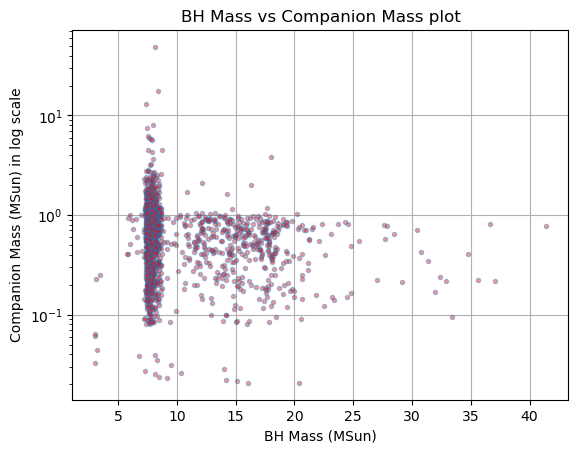

In [4]:
plt.figure()
plt.plot(BH_Mass, Companion_Mass, linestyle = 'none', marker = '.', mfc = 'red', alpha = 0.4)
plt.xlabel("BH Mass (MSun)")
plt.ylabel("Companion Mass (MSun) in log scale")
plt.yscale('log')                                                        ##Here the log scale along y axis gives much more details than linear scale
plt.title("BH Mass vs Companion Mass plot")
plt.grid()
plt.show()


### @ Solution of the third part

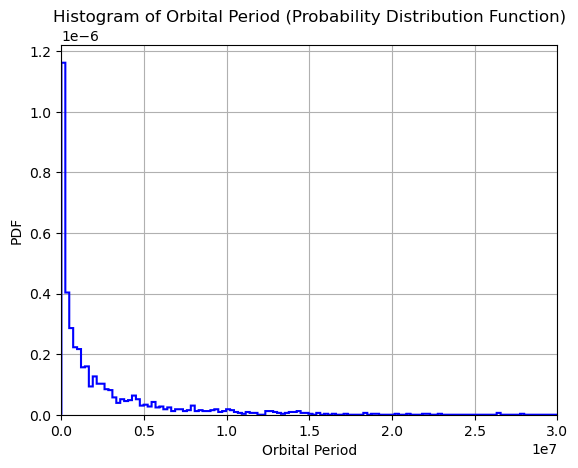

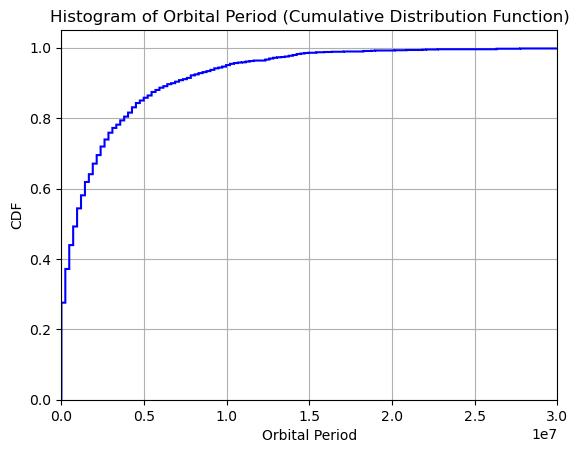

In [5]:
plt.figure()
plt.hist(Orbital_Period, bins=1400, density=True,histtype='step', alpha=1, color='blue', linewidth=1.5)
plt.xlim(0, 3e7)                                             ##Here I have restricted the range of x from 0 to 3e7 because after that there is no significant change in curve
plt.xlabel('Orbital Period')
plt.ylabel("PDF")
plt.title("Histogram of Orbital Period (Probability Distribution Function)")
plt.grid()
plt.show()

plt.figure()
plt.hist(Orbital_Period, bins=1400, density=True,histtype='step', alpha=1, color='blue', linewidth=1.5, cumulative = 'true' )
plt.xlim(0, 3e7)   
plt.xlabel('Orbital Period')
plt.ylabel("CDF")
plt.title("Histogram of Orbital Period (Cumulative Distribution Function)")
plt.grid()
plt.show()

### @ Solution of the fourth part


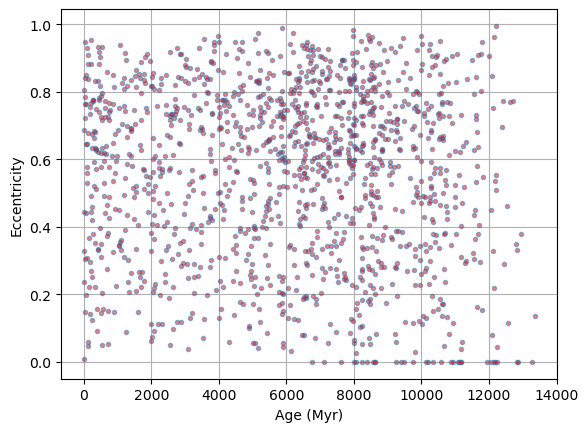

In [6]:
plt.figure()
plt.plot(Age, Eccentricity, linestyle = 'none', marker = '.', mfc = 'red', alpha = 0.5)
plt.xlabel("Age (Myr)")
plt.ylabel("Eccentricity")
plt.grid()
plt.show()


# Question 4

### @ Solution of the first part

In [7]:
##The output is in sign-magnetude format where the extreme left digit indicates if the number is +ve or -ve by 1 or 0 respectively

input_number = -33

def binary(x):
    quotient = abs(x)
    dig = []
    if x ==0:
        print("Ans is: 0")
    if x!=0:
        while quotient > 1:
            dig.append(str(quotient % 2))
            quotient = quotient // 2
        dig.append(str('1'))                                         ##Added the remainder 1 which was not added by the above loop
        if x >= 1:
            dig.append(str('1 '))
        if x <=-1:
            dig.append(str('0 '))
        reversed_dig = dig[::-1]
        joined_digits = ''.join(reversed_dig)
        print("Ans is (First bit is sign bit): ", joined_digits)
        return



binary(input_number)


Ans is (First bit is sign bit):  0 100001


### @ Solution of the second part

In [8]:
##Here we do it in steps
input = -777.552684

def num_to_mac(x):
    ####Special cases
    if x == 0:
        return 0, ''.join(['0' for i in range(53)]), ['0','0','0','0','0','0','0','0','0','0','0'], 0
    if x == float('inf'):
        return 0, ''.join(['0' for i in range(53)]), ['1','1','1','1','1','1','1','1','1','1','1'], 2047
    if x == float('-inf'):
        return 1, ''.join(['0' for i in range(53)]), ['1','1','1','1','1','1','1','1','1','1','1'], 2047


    ####Determine the sign bit
    sgn = 1 if x < 0 else 0    

    ####Take absolute value of x
    x = abs(x)

    ####Divide the number into pure integer and pure fraction
    integer = int(x)
    float_num = x - integer

    ####Binary of integer
    int_bin = []
    if integer == 0:
        int_bin = ['0']
    else:
        while integer > 0:
            int_bin.append(str(integer % 2))
            integer //= 2
        int_bin.pop()
        int_bin = int_bin[::-1]                            ##Binary of integer part

    ####Binary of float_num
    quotientf = float_num
    digf = []
    for i in range(53):
        quotientf = quotientf*2
        if quotientf < 1:
            quotientf = quotientf
            digf.append(str(0))
        if quotientf >=1:
            quotientf = quotientf-1
            digf.append(str(1))

    ####Form the mantissa set
    mantissa = int_bin + digf
    mantissa = mantissa[0:52]
    mantissa = ''.join(mantissa)                            ##1.M format

    ####Form the exponent part
    exponent = len(int_bin) + 1023                       ##Correcting bias
    integer_exp = exponent
    int_bin_exp = []
    if integer_exp == 0:
        int_bin_exp = ['0']
    else:
        while integer_exp > 0:
            int_bin_exp.append(str(integer_exp % 2))
            integer_exp //= 2
        int_bin_exp = int_bin_exp[::-1]                            ##Binary of exponent

    return sgn, mantissa, int_bin_exp, exponent

Sign, mantissa, exp, exp_binary= num_to_mac(input)

print(f"The sign bit is: {Sign}")
print(f"The mantissa is: {mantissa}")
print(f"The exponant is: {''.join(exp)} := {exp_binary}")
print(f"In the IEEE 754 Double precession format, the number is (1xSign + 11xExponent + 52xMantissa): {Sign}{''.join(exp)}{mantissa}")

The sign bit is: 1
The mantissa is: 1000010011000110101111100101100101101100100000101110
The exponant is: 10000001000 := 1032
In the IEEE 754 Double precession format, the number is (1xSign + 11xExponent + 52xMantissa): 1100000010001000010011000110101111100101100101101100100000101110


### @ Solution of the third part

In [9]:
def mac_to_num(binary_str):
    ##Check that the binary string is 64-bits long
    if len(binary_str) != 64:
        raise ValueError("Binary string must be 64 bits long.")

    ##Extract the sign bit (1 bit)
    sign_bit = int(binary_str[0], 2)

    ##Extract the exponent bits (11 bits)
    exponent_bits = binary_str[1:12]
    exponent = int(exponent_bits, 2) - 1023                                                     ####Bias correction

    ##Extract the mantissa bits (52 bits)
    mantissa_bits = binary_str[12:]
    ##Convert mantissa bits to a fraction
    mantissa = 1                                                                                ##Start with the implicit leading 1
    for i in range(len(mantissa_bits)):
        mantissa += int(mantissa_bits[i], 2) * 2 ** -(i + 1)

    ##Calculate the decimal value
    decimal_value = (-1) ** sign_bit * mantissa * (2 ** exponent)
    
    return decimal_value

##Test the function with a known IEEE 754 binary string for a number
binary_str = "1100000010001000010011000110101111100101100101101100100000101110"                 ##Example binary string
decimal_value = mac_to_num(binary_str)
print(f"Decimal value: {decimal_value}")


Decimal value: -777.552684


# Question 5

### @ Solution of the first part

* In double precession representation, the number format is: 1xSign + 11xExponent + 52xMantissa
* But here the value of exponent varies from -1022 to 1023. 
* So the smallest positive non zero floating point number be, $(-1)^0 * (2^{-1022}) * (2^{-52})$ = $4.940656458412465*10^{-324}$

In [10]:
small = 2**(-1074)
print(f"Smallest number is: {small:0.16}")

Smallest number is: 4.940656458412465e-324


### @ Solution of the first part

>For smallest possible real non-zero positive floating point number, 
* sign: 0
* Exponent: 00000000000
* Mantissa: 0000000000000000000000000000000000000000000000000001
* SO the number in IEEE 754 format is: 0000000000000000000000000000000000000000000000000000000000000001
#### This is required machine code

# Question 6

### @ Solution of the 1st part

In [11]:
input = -7     ###Given that input is integer but not specified if it is positive or negative

def fact(x):
    if x < 0:
        print("Error!!!!! \n"
              "Input is negative")
        return
    if x ==0:
        return 1
    if x > 0:
        term = x
        factorial = 1
        while term > 0:
            factorial = factorial * term
            term = term -1
        return factorial
    
print(input, "! = ", fact(input))


Error!!!!! 
Input is negative
-7 ! =  None


### @ Solution of the second part

In [12]:
input = 6.347
def expn(x):
    term = 1
    sum = 1
    i = 1
    while abs(term) > 1e-16:           ##It will give calculated terms upto 16th term after decimal.
        term = (x**i)/fact(i)
        sum = sum + term
        i = i + 1
    return sum

value = expn(input)

print("Exponential of %f is: %.16f" %(input, value))


Exponential of 6.347000 is: 570.7778045295348193


### @ Solution of the 3rd part

In [13]:
import time

starttime1 = time.process_time()
a = expn(0.1)
print("Exponential of 0.1 is: %0.16f" %a)
endtime1 = time.process_time()
t1 =(endtime1-starttime1)*1e6 
print("Time taken for this operation is: %.3f Mcro Sec" %(t1))

starttime2 = time.process_time()
b = expn(20)
print("Exponential of 20 is: %0.16f" %b)
endtime2 = time.process_time()
t2 =(endtime2-starttime2)*1e6 
print("Time taken for this operation is: %.3f Mcro Sec" %(t2))


Exponential of 0.1 is: 1.1051709180756473
Time taken for this operation is: 192.831 Mcro Sec
Exponential of 20 is: 485165195.4097901582717896
Time taken for this operation is: 506.339 Mcro Sec


### @ Solution of the 4th part

In [14]:
input = 20

def exp_new(x):
    term = 1
    term_array = [1]
    i_array = [0]
    sum_array = [1]
    sum = 1
    i = 1
    while abs(term) > 1e-16:            ##It will calculate terms upto 16th term after decimal.
        term = term*x/i
        term_array.append(term)         ##Stores each iteration term
        i_array.append(i)
        sum = sum + term
        sum_array.append(sum)           ##Stores cumulative sum
        i = i + 1

    return sum , term_array, sum_array, i_array




value , term_array, sum_array , i_array = exp_new(input)
print("Exponential of %f is: %.16f" %(input, value))

##Here we can get any value of terms in the series and the cumulative sum for each step as we proceed along the series. Because they are getting stored in sum_array and term_array. The example is below,
print("term_array[56] = " ,term_array[56])
print("sum_array[56] = " ,sum_array[56])

Exponential of 20.000000 is: 485165195.4097902178764343
term_array[56] =  0.010134702835402035
sum_array[56] =  485165195.4043869


### @ Solution of the 5th part

In [15]:
import time

starttime3 = time.process_time()
c, c1, c2, c3 = exp_new(0.1)
print("Exponential of 0.1 is: %0.16f" %c)
endtime3 = time.process_time()
t3 =(endtime3-starttime3)*1e6 
print("Time taken for this operation is: %.3f Mcro Sec" %(t3))
print("Time taken for this operation in the previous algorithm is: %0.3f Micro Sec" %(t1))

print('\n')

starttime4 = time.process_time()
d, d1, d2, d3 = exp_new(20)
print("Exponential of 20 is: %0.8f" %d)
endtime4 = time.process_time()
t4 =(endtime4-starttime4)*1e6 
print("Time taken for this operation is: %.3f Mcro Sec" %(t4))
print("Time taken for this operation in the previous algorithm is: %0.3f Micro Sec" %(t3))


Exponential of 0.1 is: 1.1051709180756473
Time taken for this operation is: 200.917 Mcro Sec
Time taken for this operation in the previous algorithm is: 192.831 Micro Sec


Exponential of 20 is: 485165195.40979022
Time taken for this operation is: 117.611 Mcro Sec
Time taken for this operation in the previous algorithm is: 200.917 Micro Sec


### @ Solution of the 6th part

In [16]:
import numpy as np

u = np.exp(0.1)
v = np.exp(20)

##Now we use 3rd part of question 6 for values of a and b
err1 = abs(u-a)
err2 = abs(v-b)

print(err1)
print(err2)

for i in range(17):
    if err1*10**i >= 1:
        print("Discrepancy is at %d th term after decimal point for exp(0.1)" %i)
        break 

for i in range(17):
    if err2*10**i >= 1:
        print("Discrepancy is at %d th term after decimal point for exp(20)" %i)
        break 


4.440892098500626e-16
1.1920928955078125e-07
Discrepancy is at 16 th term after decimal point for exp(0.1)
Discrepancy is at 7 th term after decimal point for exp(20)


### @ Solution of the 7th part

maxima is around the iteration value: 19


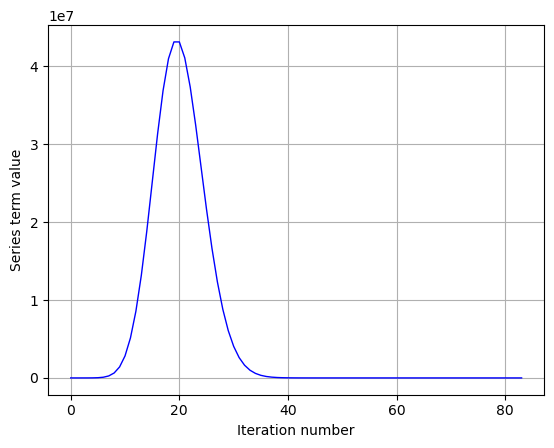

In [17]:
##We have to determine the turning point

for i in range(1, len(term_array)):
    if term_array[i]> term_array[i-1] and term_array[i] >= term_array[i+1]:
        maxima = i

print("maxima is around the iteration value: %d"  %maxima)
plt.plot(i_array, term_array, color = 'blue', linewidth = 1)
plt.xlabel("Iteration number")
plt.ylabel("Series term value")
plt.grid()
plt.show()


### @ Solution of 8th part

In [18]:
##Using 4th part

exponent, f1, f2 ,f3 = exp_new(-20)
true_exp = np.exp(-20)

print("Calculated exp(-20): ", exponent)
print("Real value of exp(-20): " , true_exp)
percentage = (exponent - true_exp)/true_exp * 100
print("Percentage error: %0.3f" %(percentage))

Calculated exp(-20):  5.621884467407823e-09
Real value of exp(-20):  2.061153622438558e-09
Percentage error: 172.754


>>>##### Here the error is caused because:

Exponential of -20.000000 is: 0.0000000056218845


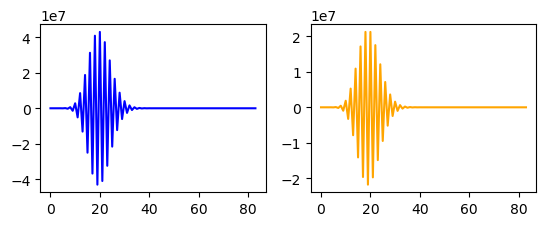

In [19]:
##First we plot each term and the cumulative sum by using same code same as question 6.4 . Then we explain.
input = -20

def exp_new(x):
    term = 1
    term_array = [1]
    i_array = [0]
    sum_array = [1]
    sum = 1
    i = 1
    while abs(term) > 1e-16:            ##It will give calculated terms upto 16th term after decimal.
        term = term*x/i
        term_array.append(term)         ##Stores each iteration term
        i_array.append(i)
        sum = sum + term
        sum_array.append(sum)           ##Stores cumulative sum
        i = i + 1

    return sum , term_array, sum_array, i_array




value , term_array, sum_array , i_array = exp_new(input)
print("Exponential of %f is: %.16f" %(input, value))




fig = plt.figure()
ax = fig.add_subplot(2,2,1)
ax.plot(i_array, term_array, color = 'blue')
ax = fig.add_subplot(2,2,2)
ax.plot(i_array, sum_array, color = 'orange')


##### Here we can see that the iterative terms are oscillating about horizontal axis with very high amplitude. This is because the taylor series expansion of the exponential function contains $\frac{x^n}{n!}$ which becomes very large with increment in the 'n'. Thus the error in them also becomes large. 
##### Now when we are subtracting a large term from another large term (which is happening here as we are adding a positive number to a negative number) the answer itself becomes small but the error doubles. This when continued repitatively, the final error becomes very large. Additionally as exp(-20) is very small, so here the error becomes compatable with the answer. Thus here the discrepancy is creating.

### @ Solution of 9th part

>There is a better way to do this. Here we can first calculate $e^{20}$ which has less error comparatively. Then we take reciprocal of the answer, as, $e^{-20} = \frac{1}{e^{20}} $

In [20]:
input = -20

def exp_new(x):
    term = 1
    sum = 1
    i = 1
    if x == 0:
        return 1
    if x >0:
        while abs(term) > 1e-16:            ##It will give calculated terms upto 16th term after decimal.
            term = term*x/i
            sum = sum + term
            i = i + 1
        return sum
    if x <0:
        x = -x        
        while abs(term) > 1e-16:            ##It will give calculated terms upto 16th term after decimal.
            term = term*x/i
            sum = sum + term
            i = i + 1
        return 1/sum


print(f"Exponential of {input} is: {exp_new(input):0.16e}")

Exponential of -20 is: 2.0611536224385583e-09


This is much more closer to the numpy value